In this notebook, we experiment with the Bias-Aware Clustering algorithm to identify:
- Which of the clustering algorithms (K-Means, DBSCAN or MeanShift) perform best in identifying biased clusters
- KMeans
- DBSCAN
- MeanShift

And we analyse the variance of the clusters

### Init


In [34]:
# Loading the libraries
from util import *
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import random
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, MinMaxScaler

import warnings
warnings.filterwarnings('ignore')

In [36]:
raw_data = pd.read_csv(r'..\Preprocessed_datasets\preprocessed_german_credit.csv', index_col=0)
errors = raw_data['errors']
features = raw_data.drop(['predicted_class', 'true_class', 'errors'], axis=1)
raw_data.head()

Age  Job  Credit amount  Duration  Purpose_car  \
136   27    2           8613        27            1   
76    34    2           3965        42            0   
280   23    2           3368        15            1   
319   27    1           3643        15            0   
174   26    2           3414        21            0   

     Purpose_domestic appliances  Purpose_education  \
136                            0                  0   
76                             0                  0   
280                            0                  0   
319                            0                  0   
174                            0                  1   

     Purpose_furniture/equipment  Purpose_radio/TV  Purpose_repairs  ...  \
136                            0                 0                0  ...   
76                             0                 1                0  ...   
280                            0                 0                0  ...   
319                            1                 0                0  ...   
174                            0                 0                0  ...   

     Savings_rich  Check_moderate  Check_no_inf  Check_rich  Age_cat_Young  \
136             1               0             1           0              1   
76              0               0             0           0              1   
280             1               0             1           0              0   
319             0               0             0           0              1   
174             0               0             0           0              1   

     Age_cat_Adult  Age_cat_Senior  predicted_class  true_class  errors  
136              0               0                0         0.0     0.0  
76               0               0                0         1.0     1.0  
280              0               0                0         0.0     0.0  
319              0               0                0         0.0     0.0  
174              0               0                0         1.0     1.0  

[5 rows x 27 columns]

### Scaling the features

In [14]:
# Scaling all attributes
to_scale = features.columns
features[to_scale] = StandardScaler().fit_transform(features[to_scale])
features[:5]

# Scaling the errors
errors_col = MinMaxScaler(feature_range = (0,1.0)).fit_transform(raw_data[['errors']])
scaling_factor = 0.8 #needs to be converted to scaling range
scaled_errors = scaling_factor * errors_col


### Utils

In [4]:
# TODO: experiment with different random states, increase number of runs
clus_model_kwargs = {
    "n_clusters": 2,
    "init": "k-means++",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 2,
}

Age       Job  Credit amount  Duration  Purpose_car  \
136 -0.736682  0.222911       2.097685  0.541581     1.659987   
76  -0.098692  0.222911       0.299478  1.760861    -0.602414   
280 -1.101248  0.222911       0.068512 -0.433842     1.659987   
319 -0.736682 -1.346756       0.174903 -0.433842    -0.602414   
174 -0.827824  0.222911       0.086308  0.053870    -0.602414   
..        ...       ...            ...       ...          ...   
132 -0.736682 -1.346756      -0.186828 -0.433842    -0.602414   
185 -0.372116  0.222911      -0.708339 -0.433842    -0.602414   
41  -0.827824  0.222911      -0.786488 -0.677698    -0.602414   
108 -0.463258  0.222911       1.752590  0.297725    -0.602414   
56   1.541855  1.792578       1.267833 -0.677698    -0.602414   

     Purpose_domestic appliances  Purpose_education  \
136                    -0.077152          -0.250785   
76                     -0.077152          -0.250785   
280                    -0.077152          -0.250785   
319                    -0.077152          -0.250785   
174                    -0.077152           3.987480   
..                           ...                ...   
132                    -0.077152          -0.250785   
185                    -0.077152          -0.250785   
41                     -0.077152          -0.250785   
108                    -0.077152          -0.250785   
56                     -0.077152          -0.250785   

     Purpose_furniture/equipment  Purpose_radio/TV  Purpose_repairs  ...  \
136                    -0.547723         -0.620682        -0.109435  ...   
76                     -0.547723          1.611131        -0.109435  ...   
280                    -0.547723         -0.620682        -0.109435  ...   
319                     1.825742         -0.620682        -0.109435  ...   
174                    -0.547723         -0.620682        -0.109435  ...   
..                           ...               ...              ...  ...   
132                     1.825742         -0.620682        -0.109435  ...   
185                    -0.547723          1.611131        -0.109435  ...   
41                     -0.547723          1.611131        -0.109435  ...   
108                     1.825742         -0.620682        -0.109435  ...   
56                     -0.547723          1.611131        -0.109435  ...   

     Check_rich  Age_cat_Young  Age_cat_Adult  Age_cat_Senior  scaled_errors  \
136   -0.250785       1.249242      -0.761209       -0.191859            0.0   
76    -0.250785       1.249242      -0.761209       -0.191859            0.3   
280   -0.250785      -0.800485      -0.761209       -0.191859            0.0   
319   -0.250785       1.249242      -0.761209       -0.191859            0.0   
174   -0.250785       1.249242      -0.761209       -0.191859            0.3   
..          ...            ...            ...             ...            ...   
132   -0.250785       1.249242      -0.761209       -0.191859            0.0   
185   -0.250785       1.249242      -0.761209       -0.191859            0.0   
41    -0.250785       1.249242      -0.761209       -0.191859            0.0   
108   -0.250785       1.249242      -0.761209       -0.191859            0.0   
56    -0.250785      -0.800485       1.313700       -0.191859            0.3   

     predicted_class  true_class  errors  clusters  new_clusters  
136                0         0.0     0.0         0            -1  
76                 0         1.0     1.0         0            -1  
280                0         0.0     0.0         0            -1  
319                0         0.0     0.0         0            -1  
174                0         1.0     1.0         0            -1  
..               ...         ...     ...       ...           ...  
132                0         0.0     0.0         0            -1  
185                0         0.0     0.0         0            -1  
41                 0         0.0     0.0         0            -1  
108                0    

In [88]:
def initialize_dataset(raw_data, with_errors=True, just_features=True, scale_features=True, with_classes=True):
    """Initialisation of the dataset. Scales all the features and can also scale the errors, which can be included or excluded for clustering 
    It returns a scaled dataset with new columns "clusters" = 0 and "new_clusters" = -1, which are required for HBAC """
    new_data = raw_data.copy(deep=True)
    
    if with_errors:
        errors_col = MinMaxScaler(feature_range = (0,1.0)).fit_transform(new_data[['errors']])
        scaling_factor = 0.3 #needs to be converted to scaling range [0.2 - 1.2]
        scaled_errors = scaling_factor * errors_col
        new_data['scaled_errors'] = scaled_errors

    if just_features:
        new_data = new_data.drop(['predicted_class', 'true_class', 'errors'], axis=1)

    if scale_features:
        to_scale = raw_data.drop(['predicted_class', 'true_class', 'errors'], axis=1).columns
        new_data[to_scale] = StandardScaler().fit_transform(features[to_scale])
    
    if with_classes:
        for col in ['predicted_class', 'true_class', 'errors']:
            new_data[col] = raw_data[col]

    new_data['clusters'] = 0
    new_data['new_clusters'] = -1
    return new_data

def get_random_cluster(clusters):
    """This function returns the value of a random cluster
    clusters Df.Column the column clusters"""
    result = -1
    while (result == -1):
        result = random.randint(0, len(clusters.unique()))
    return result

def plot_clusters(data):
    """This function returns a scatterplot of the clusters"""    
    scatterplot = sns.scatterplot(data=data, x="Age", y="Credit amount", hue="clusters", size='errors', sizes=(100, 20), palette="tab10")
    plt.show()

def accuracy(results):
    """This function calculates the accuracy of a DF dataframe
    It requires a df.column named "errors" """ 
    if len(results) == 0:
        print("You are calculating the accuracy on a empty cluster") 
    correct = results.loc[results['errors'] == 0]
    acc = len(correct)/len(results)
    return acc

def bias_acc(data, cluster_id, cluster_col):
    """ This function calculates the negative bias, which is the accuracy of the selected cluster - the accuracy of the remaining clusters 
    Cluster col: the name of the DF column where the cluster assignments are """
    cluster_x = data.loc[data[cluster_col] == cluster_id]
    if len(cluster_x) ==0:
        print("This is an empty cluster! cluster ", cluster_id)
    remaining_clusters = data.loc[data[cluster_col] != cluster_id]
    if len(remaining_clusters) == 0:
        print("This cluster is the entire dataset. cluster ", cluster_id)
    return accuracy(cluster_x) - accuracy(remaining_clusters)

def bias_acc_towards_global_average(data, cluster_id, cluster_col, ave_acc):
    """ This function calculates the negative bias, which is the accuracy of the selected cluster - the average accuracy
    Cluster col: the name of the DF column where the cluster assignments are """
    cluster_x = data.loc[data[cluster_col] == cluster_id]
    return accuracy(cluster_x) - ave_acc

def get_next_cluster(data):
    """ This function returns the cluster number with the highest variance. The variance is calculated based on the errors of each cluster.
    The cluster with the highest variance will be selected as splitting cluster
    The function requires df.columns named "clusters" and "errors" """
    n_cluster = max(data['clusters'])
    highest_variance = -1
    cluster_number = 0

    for i in data['clusters'].unique():
        if (i == -1):
            continue
        cluster_i = data.loc[data['clusters'] == i]
        variance_cluster = np.var(cluster_i['errors'])
        
        if variance_cluster > highest_variance:
            highest_variance = variance_cluster
            cluster_number = i
            print('--> Cluster with the highest variance:', cluster_number)

    return cluster_number

def get_max_abs_bias(fulldata, function=bias_acc):
    """ This function returns the absolute value of highest negative bias of the newly introduced clusters 
    fulldata (DataFrame) should include a column new_clusters """
    max_abs_bias = -999999
    for cluster_number in fulldata['new_clusters'].unique():
        if cluster_number == -1: #Outliers in DBScan
            continue
        current_bias = abs(function(fulldata, cluster_number, "new_clusters")) # abs function
        if current_bias > max_abs_bias:
            max_abs_bias = current_bias
    return max_abs_bias

def get_max_negative_bias(fulldata, function=bias_acc):
    """ This function returns the highest negative bias of the newly introduced clusters 
    fulldata (DataFrame) should include a column new_clusters  --> used for identifying underperformed clusters"""
    max_abs_bias = -999999
    for cluster_number in fulldata['new_clusters'].unique():
        if cluster_number == -1: #Outliers in DBScan
            continue
        current_bias = (function(fulldata, cluster_number, "new_clusters")) # abs function
        if current_bias < max_abs_bias:
            max_abs_bias = current_bias
    return max_abs_bias

def get_max_abs_bias_cluster(fulldata, function=bias_acc):
    """ This function returns the cluster linked to the highest negative bias of the newly introduced clusters 
    fulldata (DataFrame) should include a column new_clusters """
    max_abs_bias = 100
    best_cluster = -2
    for cluster_number in fulldata['clusters'].unique():
        if cluster_number == -1: #Outliers in DBScan
            continue
        current_bias = function(fulldata, cluster_number, "clusters") # abs function
        print(f"{cluster_number} has bias {current_bias}")
        if current_bias < max_abs_bias:
            max_abs_bias = current_bias
            best_cluster = cluster_number
    return best_cluster

def calculate_variance(data):
    """This function calculates the variance for a DF. It requires a df.column named "clusters" and it uses the bias_acc_towards_global_avg"""
    variance_list_local = []
    for j in data['clusters'].unique():
        average_accuracy = accuracy(data)
        neg_bias_clus = bias_acc(data, j, 'clusters') 
        variance_list_local.append(neg_bias_clus) #variance_list was "neg_bias_list" before
    variance = np.var(variance_list_local) #this was "neg_bias_list"
    return variance

def get_min_cluster_size(data):
    """Returns the size of the smallest new cluster"""
    min_cluster_size = len(data)
    for i in data['new_clusters'].unique():
        # exclude the cluster -1 from being seen as a cluster, since it contains outliers
        if i == -1:
            continue
        size = len(full_data.loc[full_data['new_clusters']==i])
        if size < min_cluster_size:
            min_cluster_size = size
    return min_cluster_size

## 1. Bias-Aware KMeans Clustering 

In [141]:
# Combine scaled features w. class & error labels
full_data = initialize_dataset(raw_data)

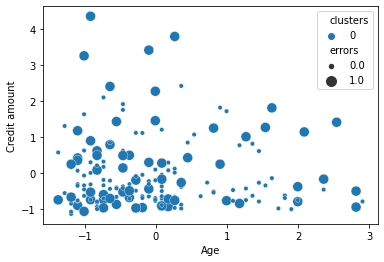

average_accuracy is:  0.6272189349112426


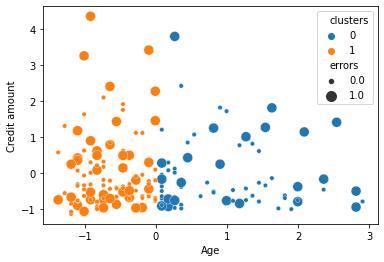

--> Cluster with the highest variance: 1


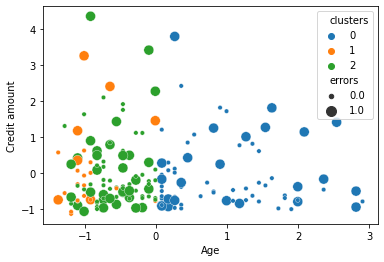

--> Cluster with the highest variance: 2


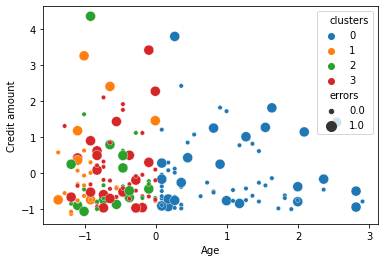

--> Cluster with the highest variance: 3
--> Cluster with the highest variance: 2
MAX_ITER
[0.0011020698493159496, 0.005139449108148971, 0.004240997170609023, 0.004240997170609023, 0.004240997170609023, 0.004240997170609023, 0.004240997170609023, 0.004240997170609023, 0.004240997170609023, 0.004240997170609023, 0.004240997170609023, 0.004240997170609023, 0.004240997170609023, 0.004240997170609023, 0.004240997170609023, 0.004240997170609023, 0.004240997170609023, 0.004240997170609023]


In [142]:
MAX_ITER = 20
x = 0 # cluster number
initial_bias = 0
plot_clusters(full_data)
variance_list = []
average_accuracy = accuracy(full_data) 
minimal_splittable_cluster_size = 15
minimal_acceptable_cluster_size = 8
print("average_accuracy is: ", average_accuracy) 

for i in range(1, MAX_ITER):
    if i != 1:
        variance_list.append(calculate_variance(full_data)) 
    full_data['new_clusters'] = -1
    candidate_cluster = full_data.loc[full_data['clusters'] == x] 

    if len(candidate_cluster) < minimal_splittable_cluster_size:
        x = get_random_cluster(full_data['clusters'])
        continue
    
    # Apply Kmeans 
    kmeans_algo = KMeans(**clus_model_kwargs).fit(candidate_cluster.drop(['clusters', 'new_clusters', 'predicted_class', 'true_class', 'errors'], axis=1))
    
    candidate_cluster['new_clusters'] = pd.DataFrame(kmeans_algo.predict(candidate_cluster.drop(['clusters', 'new_clusters', 'predicted_class', 'true_class',                                                                                                               'errors'], axis=1)),index=candidate_cluster.index) 
    full_data['new_clusters'] = candidate_cluster['new_clusters'].combine_first(full_data['new_clusters'])

    max_abs_bias = get_max_negative_bias(full_data) # was get_max_abs_bias
    min_new_size = get_min_cluster_size(full_data)
    
    if (max_abs_bias <= initial_bias) & (min_new_size > minimal_acceptable_cluster_size): #abs: >
        # Add new cluster
        n_cluster = max(full_data['clusters'])
        full_data['clusters'][full_data['new_clusters'] == 1] =  n_cluster + 1
        
        plot_clusters(full_data)
        x = get_next_cluster(full_data)
        initial_bias = max_abs_bias
    else:
        x = get_random_cluster(full_data['clusters'])
        
print('MAX_ITER')



print(variance_list)


### 1. Analysing the clustering results


In [143]:
# Goal 1: Identifying highest biased cluster
c = get_max_abs_bias_cluster(full_data)
print(f"cluster {c} has the highest negative bias")
print(full_data['clusters'].unique())
highest_biased_cluster = full_data[full_data['clusters']==c]
len(highest_biased_cluster)

accuracy_full_data = accuracy(full_data)
print(accuracy_full_data)

most_biased_cluster_kmeans_aware = bias_acc(full_data, c, 'clusters')

full_data[full_data['clusters']==c]
print(most_biased_cluster_kmeans_aware)

3 has bias -0.049829931972789177
1 has bias 0.0945402298850575
2 has bias -0.06686930091185417
0 has bias 0.033197437390797946
cluster 2 has the highest negative bias
[3 1 2 0]
0.6272189349112426
-0.06686930091185417


## Baseline KMeans

In [146]:

baseline_kmeans = KMeans(n_clusters=4, init="k-means++", n_init=10, max_iter=300, random_state=2 ).fit(full_data.drop(['clusters', 'new_clusters', 'predicted_class', 'true_class', 'errors'], axis=1))
    

full_data['clusters'] = pd.DataFrame(baseline_kmeans.predict(full_data.drop(['clusters', 'new_clusters', 'predicted_class', 'true_class',                                                                                                               'errors'], axis=1)),index=full_data.index) 

# full_data['clusters']

Text(0.5, 1.0, 'Negative Bias Variance of Instances')

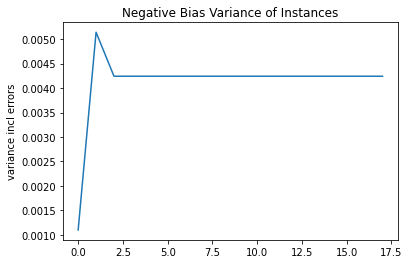

In [145]:
variance_df_kmeans = pd.DataFrame(variance_list).rename(columns={0:"variance incl errors"})
sns.lineplot(data=variance_df_kmeans, x=variance_df_kmeans.index,y="variance incl errors").set_title('Negative Bias Variance of Instances')

## 2. Bias-Aware DBSCAN

In [23]:
from sklearn.cluster import DBSCAN

In [91]:
# Combine scaled features w. class & error labels
full_data = initialize_dataset(raw_data)

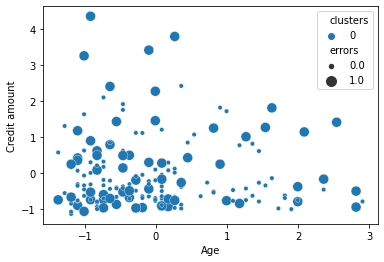

this is the current cluster:  0
[ 0 -1]
[ 0 -1]
cluster: 0
164
cluster: -1
5


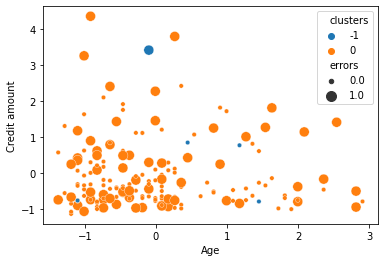

--> Cluster with the highest variance: 0
this is the current cluster:  0
[ 0. -1. -2.]
[ 0 -1]
cluster: 0.0
163
cluster: -1.0
6
cluster: -2.0
0


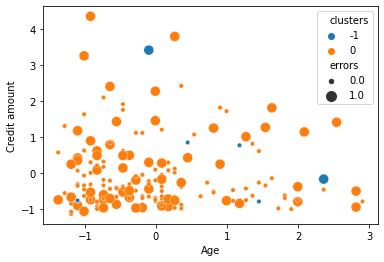

--> Cluster with the highest variance: 0
this is the current cluster:  0
[ 0.  1. -2.]
[ 0  1 -1]
cluster: 0.0
158
cluster: 1.0
5
cluster: -2.0
0


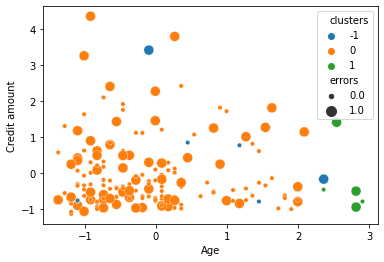

--> Cluster with the highest variance: 0
--> Cluster with the highest variance: 1
this is the current cluster:  1
[-2.  0.]
[ 0  1 -1]
cluster: -2.0
0
cluster: 0.0
158


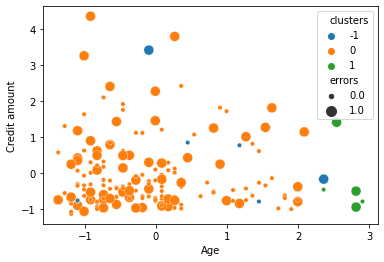

--> Cluster with the highest variance: 0
--> Cluster with the highest variance: 1
this is the current cluster:  1
[-2.  0.]
[ 0  1 -1]
cluster: -2.0
0
cluster: 0.0
158


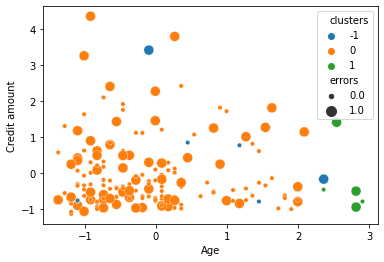

--> Cluster with the highest variance: 0
--> Cluster with the highest variance: 1
this is the current cluster:  1
[-2.  0. -1.]
[ 0  1 -1]
cluster: -2.0
0
cluster: 0.0
158
cluster: -1.0
8


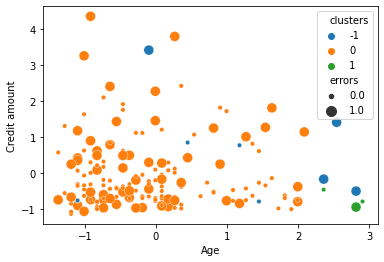

--> Cluster with the highest variance: 0
this is the current cluster:  0
[ 0. -2.]
[ 0  1 -1]
cluster: 0.0
158
cluster: -2.0
0


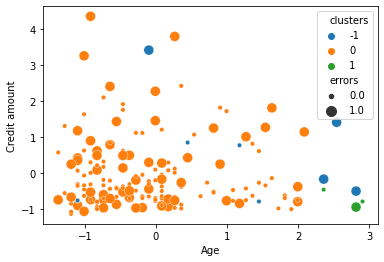

--> Cluster with the highest variance: 0
this is the current cluster:  0
[ 0. -2.]
[ 0  1 -1]
cluster: 0.0
158
cluster: -2.0
0


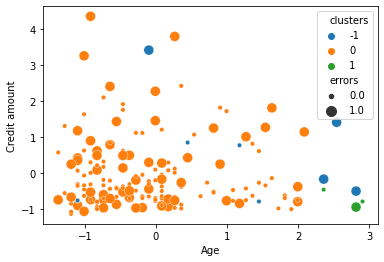

--> Cluster with the highest variance: 0
this is the current cluster:  0
[ 0. -2.]
[ 0  1 -1]
cluster: 0.0
158
cluster: -2.0
0


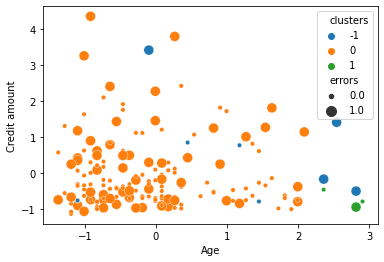

--> Cluster with the highest variance: 0
this is the current cluster:  0
[ 0. -1. -2.]
[ 0 -1  1]
cluster: 0.0
154
cluster: -1.0
12
cluster: -2.0
0


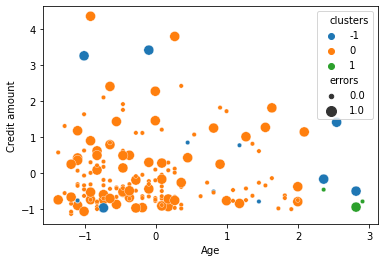

--> Cluster with the highest variance: 0
this is the current cluster:  0
[ 0. -2. -1.]
[ 0 -1  1]
cluster: 0.0
153
cluster: -2.0
0
cluster: -1.0
13


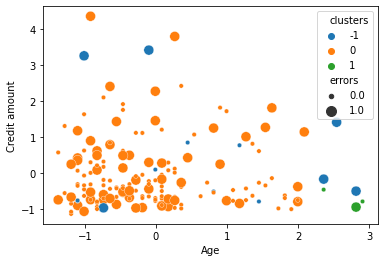

--> Cluster with the highest variance: 0
this is the current cluster:  0
[ 0. -1. -2.  1.]
[ 0 -1  1  2]
cluster: 0.0
146
cluster: -1.0
16
cluster: -2.0
0
cluster: 1.0
3


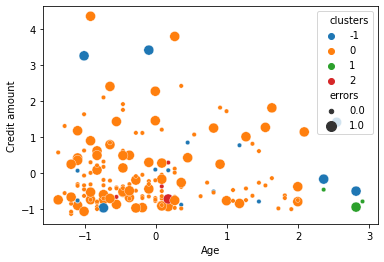

--> Cluster with the highest variance: 0
this is the current cluster:  0
[ 0. -2. -1.]
[ 0 -1  1  2]
cluster: 0.0
143
cluster: -2.0
0
cluster: -1.0
19


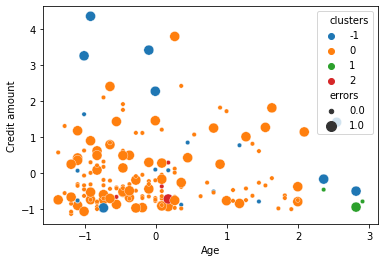

--> Cluster with the highest variance: 0
this is the current cluster:  0
[ 0. -2.  1. -1.]
[ 0 -1  3  1  2]
cluster: 0.0
131
cluster: -2.0
0
cluster: 1.0
3
cluster: -1.0
26


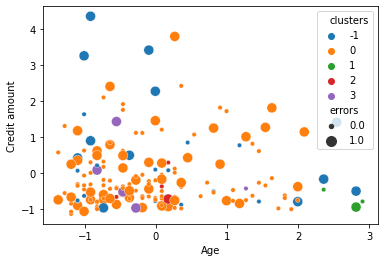

--> Cluster with the highest variance: 0
this is the current cluster:  0
[-1.  0. -2.  1.  2.]
[-1  0  3  1  4  5  2]
cluster: -1.0
34
cluster: 0.0
115
cluster: -2.0
0
cluster: 1.0
3
cluster: 2.0
4


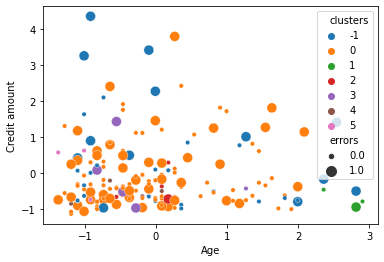

--> Cluster with the highest variance: 0
this is the current cluster:  0
[-2.  0. -1.  2.  1.]
[-1  0  3  1  4  5  2  6  7]
cluster: -2.0
0
cluster: 0.0
104
cluster: -1.0
38
cluster: 2.0
4
cluster: 1.0
3


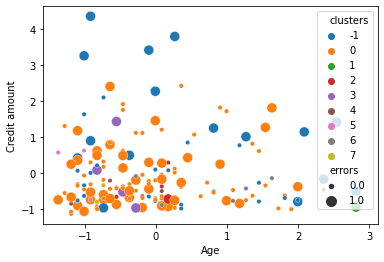

--> Cluster with the highest variance: 0
this is the current cluster:  0
[-2.  0.  1. -1.]
[-1  0  3  8  1  4  5  2  6  7]
cluster: -2.0
0
cluster: 0.0
95
cluster: 1.0
3
cluster: -1.0
42


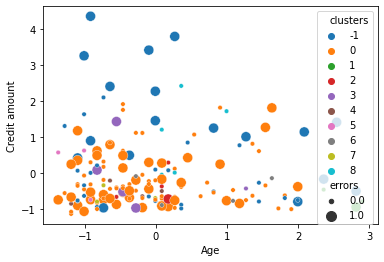

--> Cluster with the highest variance: 0
this is the current cluster:  0
[-2.  0.  1. -1.  2.  3.]
[-1  0  3  8  9  1  4  5  2 10 11  6  7]
cluster: -2.0
0
cluster: 0.0
67
cluster: 1.0
3
cluster: -1.0
56
cluster: 2.0
4
cluster: 3.0
5


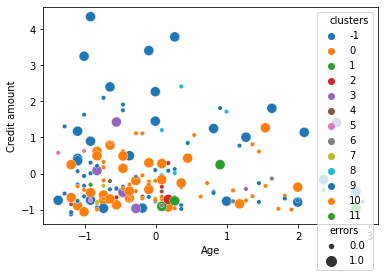

--> Cluster with the highest variance: 0
--> Cluster with the highest variance: 9
this is the current cluster:  9
[-2.  0.]
[-1  0  3  8  9  1  4  5  2 10 11  6  7]
cluster: -2.0
0
cluster: 0.0
67


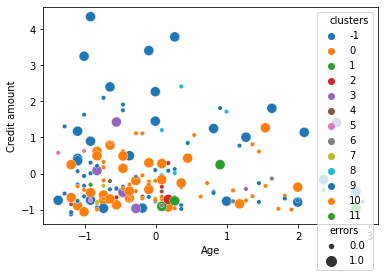

--> Cluster with the highest variance: 0
--> Cluster with the highest variance: 9
MAX_ITER
[0.03170136823319454, 0.0016727932720254526, 0.020138505255193135, 0.020138505255193135, 0.020138505255193135, 0.009027638302768698, 0.009027638302768698, 0.009027638302768698, 0.009027638302768698, 0.01032280106870193, 0.005296267243939921, 0.003435064053349403, 0.004160644493965701, 0.04535709701709527, 0.06792021291511077, 0.07301253991695296, 0.07357956585126955, 0.08732527016152877]


In [92]:
MAX_ITER = 20 #should be increased
epsilon = 7
minimum_samples = 3
x = 0 # cluster number
initial_bias = 0
plot_clusters(full_data)
variance_list = []
minimal_splittable_cluster_size = 5
minimal_acceptable_cluster_size = 1
average_accuracy = accuracy(full_data)

for i in range(1, MAX_ITER):
    print('this is the current cluster: ', x)
    epsilon = epsilon - 0.2
    if i != 1:
        variance_list.append(calculate_variance(full_data)) 
    full_data['new_clusters'] = -2
    candidate_cluster = full_data.loc[full_data['clusters'] == x] 

    if len(candidate_cluster) < minimal_splittable_cluster_size:
        x = get_random_cluster(full_data['clusters'])
        continue
    
    # Apply DBSCAN
    candidate_cluster['new_clusters'] = pd.DataFrame(DBSCAN(eps=epsilon, min_samples=minimum_samples).fit_predict(candidate_cluster.drop(['clusters', 'new_clusters', 'predicted_class', 'true_class', 'errors'], axis=1)), index=candidate_cluster.index)

    full_data['new_clusters'] = candidate_cluster['new_clusters'].combine_first(full_data['new_clusters'])

    max_abs_bias = get_max_negative_bias(full_data) #get max abs bias
    min_new_size = get_min_cluster_size(full_data)
    
    if (max_abs_bias <= initial_bias) & (min_new_size > minimal_acceptable_cluster_size): #>
        # Add new cluster
        n_cluster = max(full_data['clusters'])
        # print(full_data['new_clusters'])
        
        first = True
        dif = 1
        for clstr in full_data['new_clusters'].unique():
            if (clstr == -1):
                full_data['clusters'][full_data['new_clusters'] == clstr] = -1
            elif (clstr == -2):
                continue
            elif first:
                full_data['clusters'][full_data['new_clusters'] == clstr] = x
                first = False
            else:
                full_data['clusters'][full_data['new_clusters'] == clstr] =  n_cluster + dif
                dif += 1

        plot_clusters(full_data)
        x = get_next_cluster(full_data)
        initial_bias = max_abs_bias
    else:
        x = get_random_cluster(full_data['clusters'])
        
print('MAX_ITER')

print(variance_list)

## 2. DBSCAN Results

In [94]:
# Goal 1: Identifying highest biased cluster
c = get_max_abs_bias_cluster(full_data)
print(f"cluster {c} has the highest negative bias")
print(full_data['clusters'].unique())
highest_biased_cluster = full_data[full_data['clusters']==c]
len(highest_biased_cluster)

accuracy_full_data = accuracy(full_data)
print('Overall accuracy:', accuracy_full_data)

most_biased_cluster_dbscan_aware = bias_acc(full_data, c, 'clusters')

full_data[full_data['clusters']==c]
print('Highest found negative bias:', most_biased_cluster_dbscan_aware)

0 has bias -0.05004389815627752
3 has bias -0.4402439024390244
8 has bias 0.38414634146341464
9 has bias -0.05820105820105825
1 has bias 0.04016064257028107
4 has bias 0.38414634146341464
5 has bias 0.37951807228915657
2 has bias 0.12575757575757573
10 has bias -0.2991967871485944
11 has bias -0.38636363636363635
6 has bias 0.38181818181818183
7 has bias 0.37951807228915657
cluster 3 has the highest negative bias
[-1  0  3  8  9  1  4  5  2 10 11  6  7]
Overall accuracy: 0.6272189349112426
Highest found negative bias: -0.4402439024390244


<AxesSubplot:ylabel='variance excl errors'>

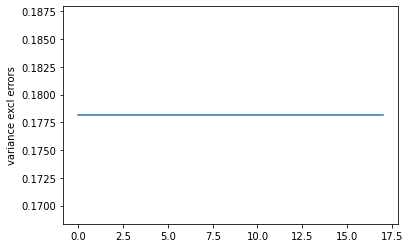

In [32]:
variance_df_dbscan = pd.DataFrame(variance_list).rename(columns={0:"variance excl errors"})
sns.lineplot(data=variance_df_dbscan, x=variance_df_dbscan.index,y="variance excl errors")

## 3. Bias-Aware Mean Shift 


The estimate_bandwidth function to estimate the bandwidth parameter of Mean Shift is significantly better than manually selecting a bandwidth value.

In [131]:
from sklearn.cluster import MeanShift, estimate_bandwidth 
full_data = initialize_dataset(raw_data)

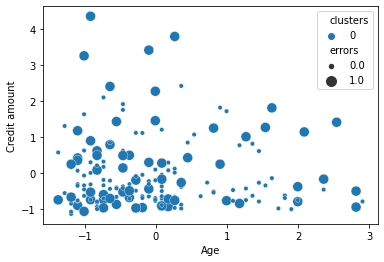

average_accuracy is:  0.6272189349112426
smallest cluster: 1
CHECK!


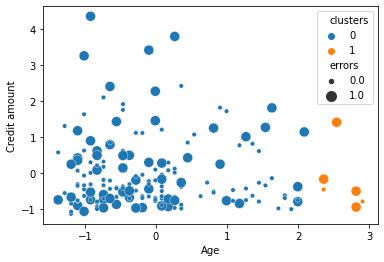

--> Cluster with the highest variance: 0
smallest cluster: 1
CHECK!


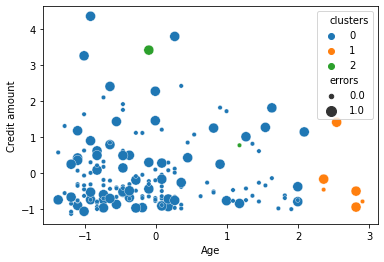

--> Cluster with the highest variance: 0
--> Cluster with the highest variance: 2
smallest cluster: 1
CHECK!


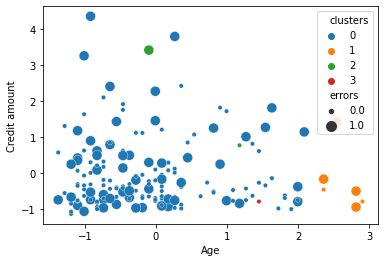

--> Cluster with the highest variance: 0
--> Cluster with the highest variance: 2
smallest cluster: 6
CHECK!


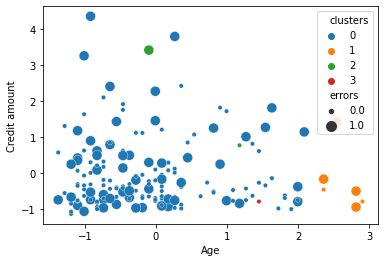

--> Cluster with the highest variance: 0
--> Cluster with the highest variance: 2
smallest cluster: 1
CHECK!


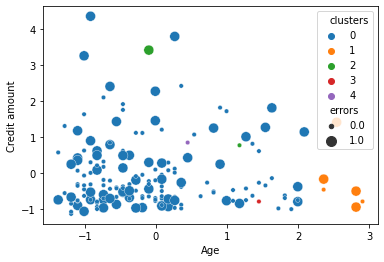

--> Cluster with the highest variance: 0
--> Cluster with the highest variance: 2
MAX_ITER
[0.09284420858059309, 0.05667543019026105, 0.05667543019026105, 0.07069608939632041, 0.07069608939632041, 0.07069608939632041, 0.07069608939632041, 0.07069608939632041, 0.07069608939632041, 0.07069608939632041, 0.07069608939632041, 0.07069608939632041, 0.07069608939632041, 0.07069608939632041, 0.07069608939632041, 0.07069608939632041, 0.07069608939632041, 0.07362667049369619]


In [132]:
MAX_ITER = 20
x = 0 # cluster number
initial_bias = 0
# bw1 = 1.5
bw1 = estimate_bandwidth(full_data)
plot_clusters(full_data)
variance_list = []
average_accuracy = accuracy(full_data) 
minimal_splittable_cluster_size = 5
minimal_acceptable_cluster_size = 0
print("average_accuracy is: ", average_accuracy) 


for i in range(1, MAX_ITER):
    if i != 1:
        variance_list.append(calculate_variance(full_data)) 
    full_data['new_clusters'] = -1
    candidate_cluster = full_data.loc[full_data['clusters'] == x] 

    if len(candidate_cluster) < minimal_splittable_cluster_size:
        x = get_random_cluster(full_data['clusters'])
        continue
    
    # Apply MeanShift
    candidate_cluster['new_clusters'] = pd.DataFrame(MeanShift(bandwidth=bw1).fit_predict(candidate_cluster.drop(['clusters', 'new_clusters', 'predicted_class',                                                    'true_class', 'errors'], axis=1)), index=candidate_cluster.index)

    full_data['new_clusters'] = candidate_cluster['new_clusters'].combine_first(full_data['new_clusters']) 

    max_abs_bias = get_max_negative_bias(full_data) #get max abs bias
    min_new_size = get_min_cluster_size(full_data)
    print("smallest cluster:",min_new_size)
    if (max_abs_bias <= initial_bias) & (min_new_size > minimal_acceptable_cluster_size): 
        print("CHECK!")
        # Add new cluster
        n_cluster = max(full_data['clusters'])
        full_data['clusters'][full_data['new_clusters'] == 1] =  n_cluster + 1
        
        plot_clusters(full_data)
        x = get_next_cluster(full_data)
        initial_bias = max_abs_bias
    else:
        x = get_random_cluster(full_data['clusters'])
        
print('MAX_ITER')

print(variance_list)

## 3. Mean-Shift Results

In [133]:
# Goal 1: Identifying highest biased cluster
c = get_max_abs_bias_cluster(full_data)
print(f"cluster {c} has the highest negative bias")
print(full_data['clusters'].unique())
highest_biased_cluster = full_data[full_data['clusters']==c]
len(highest_biased_cluster)

accuracy_full_data = accuracy(full_data)
print('Overall accuracy:', accuracy_full_data)

most_biased_cluster_meanshift_aware = bias_acc(full_data, c, 'clusters')

full_data[full_data['clusters']==c]
print('Highest found negative bias:', most_biased_cluster_meanshift_aware)

0 has bias 0.1352201257861635
1 has bias -0.3047034764826176
3 has bias 0.375
4 has bias 0.375
2 has bias -0.12874251497005984
cluster 1 has the highest negative bias
[0 1 3 4 2]
Overall accuracy: 0.6272189349112426
Highest found negative bias: -0.3047034764826176


## Goal 1: Comparing Bias-Aware KMeans/DBSCAN/MeanShift with finding the highest negatively biased cluster

<BarContainer object of 5 artists>

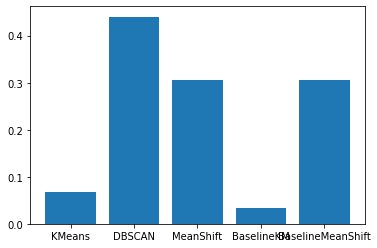

In [158]:
results_array = []

results_array.append(-most_biased_cluster_kmeans_aware)
results_array.append(-most_biased_cluster_dbscan_aware)
results_array.append(-most_biased_cluster_meanshift_aware)
results_array.append(-most_biased_cluster_baselinekm)
results_array.append(-most_biased_cluster_baselinemeanshift)


plt.bar(['KMeans', 'DBSCAN', 'MeanShift', 'BaselineKM', 'BaselineMeanShift'], results_array)
# todo: add baselines


<AxesSubplot:ylabel='variance excl errors'>

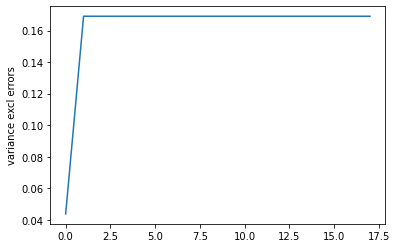

In [78]:
variance_df = pd.DataFrame(variance_list).rename(columns={0:"variance excl errors"})
sns.lineplot(data=variance_df, x=variance_df.index,y="variance excl errors")

# Baselines: Clustering without recursivity

## KMeans without  recursivity

In [155]:
full_data = initialize_dataset(raw_data)

In [156]:

baseline_kmeans = KMeans(n_clusters=2, init="k-means++", n_init=10, max_iter=300, random_state=2).fit(full_data.drop(['clusters', 'new_clusters', 'predicted_class', 'true_class', 'errors'], axis=1))
    

full_data['clusters'] = pd.DataFrame(baseline_kmeans.predict(full_data.drop(['clusters', 'new_clusters', 'predicted_class', 'true_class',                                                                                                               'errors'], axis=1)),index=full_data.index) 

# full_data['clusters']

In [157]:
# Goal 1: Identifying highest biased cluster
c = get_max_abs_bias_cluster(full_data)
print(f"cluster {c} has the highest negative bias")
print(full_data['clusters'].unique())
highest_biased_cluster = full_data[full_data['clusters']==c]
len(highest_biased_cluster)

accuracy_full_data = accuracy(full_data)
print('Overall accuracy:', accuracy_full_data)

most_biased_cluster_baselinekm = bias_acc(full_data, c, 'clusters')

full_data[full_data['clusters']==c]
print('Highest found negative bias:', most_biased_cluster_baselinekm)

1 has bias -0.033197437390797946
0 has bias 0.033197437390797946
cluster 1 has the highest negative bias
[1 0]
Overall accuracy: 0.6272189349112426
Highest found negative bias: -0.033197437390797946


## DBSCAN without recursivity

In [ ]:
var_list = []
epsilon = 7
minimum_samples = 3
features_i = features.copy(deep=True)
features_i["errors"] = errors

for n in range(2, 58):
    model = DBSCAN(eps=epsilon, min_samples=minimum_samples).fit_predict(features_i)
    features_i['cluster_results'] = pd.DataFrame(model, index=features_i.index)

    neg_bias_list = []
    epsilon = epsilon-0.2
    if  len(features_i["cluster_results"].unique()) == 1:
        print("One cluster left on iteration ", n)
        print("With epsilon", epsilon)
        break
    for i in features_i["cluster_results"].unique():
        print(features_i["cluster_results"].unique())
        #print('features_i', features_i)
        neg_bias_list.append(bias_acc(features_i, i,"cluster_results"))
    var_list.append(np.var(neg_bias_list))
print(var_list)

plt.plot(var_list)

## MeanShift without recursivity

In [137]:
full_data = initialize_dataset(raw_data)

In [138]:
bw1 = estimate_bandwidth(full_data)

full_data['clusters'] = pd.DataFrame(MeanShift(bandwidth=bw1).fit_predict(full_data.drop(['clusters', 'new_clusters', 'predicted_class',                                                    'true_class', 'errors'], axis=1)), index=full_data.index)

In [139]:
# Goal 1: Identifying highest biased cluster
c = get_max_abs_bias_cluster(full_data)
print(f"cluster {c} has the highest negative bias")
print(full_data['clusters'].unique())
highest_biased_cluster = full_data[full_data['clusters']==c]
len(highest_biased_cluster)

accuracy_full_data = accuracy(full_data)
print('Overall accuracy:', accuracy_full_data)

most_biased_cluster_baselinemeanshift = bias_acc(full_data, c, 'clusters')

full_data[full_data['clusters']==c]
print('Highest found negative bias:', most_biased_cluster_baselinemeanshift)

0 has bias 0.08745684695051792
1 has bias -0.3047034764826176
3 has bias 0.375
4 has bias 0.375
2 has bias -0.12874251497005984
5 has bias 0.375
cluster 1 has the highest negative bias
[0 1 3 4 2 5]
Overall accuracy: 0.6272189349112426
Highest found negative bias: -0.3047034764826176


In [ ]:
var_list = []

# experimenting with the bandwidth parameter
bw1 = estimate_bandwidth(features_i)
bw2 = None
features_i = features.copy(deep=True)
features_i["errors"] = errors

for n in range(2, 58):
    model = MeanShift(bandwidth=bw1).fit_predict(features_i)
    features_i['cluster_results'] = pd.DataFrame(model, index=features_i.index)
    #features['cluster_results'] = pd.DataFrame(DBSCAN.predict(features_i), index=features.index)
    neg_bias_list = []
    if  len(features_i["cluster_results"].unique()) == 1:
        print("One cluster left on iteration ", n)
        break
    for i in features_i["cluster_results"].unique():
        print(features_i["cluster_results"].unique())
        #print('features_i', features_i)
        neg_bias_list.append(bias_acc(features_i, i,"cluster_results"))
    var_list.append(np.var(neg_bias_list))
print(var_list)



## Visualisation & Results

In [18]:
# exporting the biased cluster dataframe for further analysis
import os
path = r'..\\Clustered_datasets\\'
# full_data.to_csv(os.path.join(path, r'biased_wine_clusters.csv'))
